# Assignment 09
## Deadline: 04/21/2021 by 11:59pm EST

## In this assignment we will review Tree based models, particularly Decision Trees.
## Working as a group is NOT allowed. You can discuss a concept and a specific technical issue with classmates but you must NOT share your answer with others.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Classification of criminal possession of a weapon using Decision trees
## (1) Load data and specify data types of 'precinct' and 'time.period' columns as string
* cpw_example.csv

In [2]:
df = pd.read_csv("../data/cpw_example.csv")

df["precinct"] = df["precinct"].astype(str)
df["time.period"] = df["time.period"].astype(str)

print(df.dtypes)
df.head()

suspected.crime              object
found.weapon                   bool
found.gun                      bool
arrested                       bool
frisked                        bool
searched                       bool
summons.issued                 bool
found.contraband               bool
force.hands                    bool
force.wall                     bool
force.ground                   bool
force.drawn                    bool
force.pointed                  bool
force.baton                    bool
force.handcuffs                bool
force.pepper                   bool
force.other                    bool
suspect.race                 object
suspect.age                   int64
suspect.build                object
suspect.sex                  object
suspect.height              float64
suspect.weight              float64
stopped.bc.desc                bool
stopped.bc.violent             bool
stopped.bc.other               bool
stopped.bc.object              bool
stopped.bc.casing           

,suspected.crime,found.weapon,found.gun,arrested,frisked,searched,summons.issued,found.contraband,force.hands,force.wall,...,additional.time,additional.sights,additional.other,radio.run,day,month,time.period,date,lat,lon
0,cpw,False,False,False,True,False,False,False,True,True,...,True,False,False,False,Saturday,January,1,2011-01-01,40.587972,-73.807674
1,cpw,False,False,False,True,False,False,False,True,False,...,True,False,False,False,Saturday,January,1,2011-01-01,40.587972,-73.807674
2,cpw,False,False,False,True,False,False,False,True,False,...,True,False,False,False,Saturday,January,1,2011-01-01,40.587972,-73.807674
3,cpw,False,False,False,True,False,False,False,True,True,...,True,False,False,False,Saturday,January,1,2011-01-01,40.587972,-73.807674
4,cpw,False,False,False,True,False,False,False,False,False,...,True,False,False,False,Saturday,January,1,2011-01-01,40.605831,-73.757783


## (2) Choose a target variable and predictors (features)
* You can either 'found.gun' or 'found.weapon' as your target variable
* Plase select predictors more than 10. You can use features from ['suspect.race', 'suspect.age', 'suspect.build', 'suspect.sex', 'suspect.height', 'suspect.weight', 'stopped.bc.desc', 'stopped.bc.violent', 'stopped.bc.other', 'stopped.bc.object', 'stopped.bc.casing', 'stopped.bc.lookout', 'stopped.bc.drugs', 'stopped.bc.clothing', 'stopped.bc.furtive', 'stopped.bc.bulge', 'precinct', 'inside.outside', 'location.housing', 'observation.period', 'officer.uniform', 'radio.run', 'day', 'month', 'time.period']. __You can use all without any selection process__.

In [3]:
X = df.iloc[:,17:34]
y = df["found.gun"]

X.head()

,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,stopped.bc.desc,stopped.bc.violent,stopped.bc.other,stopped.bc.object,stopped.bc.casing,stopped.bc.lookout,stopped.bc.drugs,stopped.bc.clothing,stopped.bc.furtive,stopped.bc.bulge,precinct
0,black,17,thin,male,5.583333,130.0,False,False,True,False,False,False,False,False,True,False,100
1,black,17,thin,male,5.583333,130.0,False,False,True,False,False,False,False,False,True,False,100
2,black,20,medium,male,6.250000,185.0,False,False,True,False,False,False,False,False,True,False,100
3,black,17,thin,male,5.500000,150.0,False,False,True,False,False,False,False,False,True,False,100
4,black,16,thin,male,5.333333,140.0,False,False,False,False,False,False,False,False,True,True,101


## (3) Convert all categorical variables into dummy variables
* Use pd.get_dummise()
* This is a magic fucntion! (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [4]:
X = pd.get_dummies(X)

print(X.dtypes)
X.head()

suspect.age             int64
suspect.height        float64
suspect.weight        float64
stopped.bc.desc          bool
stopped.bc.violent       bool
                       ...   
precinct_84             uint8
precinct_88             uint8
precinct_9              uint8
precinct_90             uint8
precinct_94             uint8
Length: 102, dtype: object


,suspect.age,suspect.height,suspect.weight,stopped.bc.desc,stopped.bc.violent,stopped.bc.other,stopped.bc.object,stopped.bc.casing,stopped.bc.lookout,stopped.bc.drugs,...,precinct_77,precinct_78,precinct_79,precinct_81,precinct_83,precinct_84,precinct_88,precinct_9,precinct_90,precinct_94
0,17,5.583333,130.0,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,17,5.583333,130.0,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,20,6.250000,185.0,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,17,5.500000,150.0,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,16,5.333333,140.0,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


## (4) Split train/test data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=0)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 216117
Train sample (y): 216117
Test sample (X): 72040
Test sample (y): 72040


## (5) Build your initial decision tree classifier model without any parameter tuning and return train/test model accuracy

In [6]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

0.9997778980829828
0.9913797890061077


## (6) Now you find the best performed _max_depth_ (tree depth), where the test score is the highest (avoiding overfitting)
* Develop for loops to repeat a decision tree classifier process and store a test score into a list
* After completing this process, please create a plot to show max_depth (x-axis) vs. test score (y-axis)
* Find the best performed _max_depth_

In [7]:
scores = []

for i in range(1, 11): 
    clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    
print(scores)

[0.9962798445308162, 0.9962798445308162, 0.9962798445308162, 0.9962659633536924, 0.9962104386451971, 0.996224319822321, 0.9961687951138256, 0.9959466962798446, 0.9959189339255969, 0.9957245974458634]


Text(0.5, 1.0, 'CPW Decision Tree Optimization')

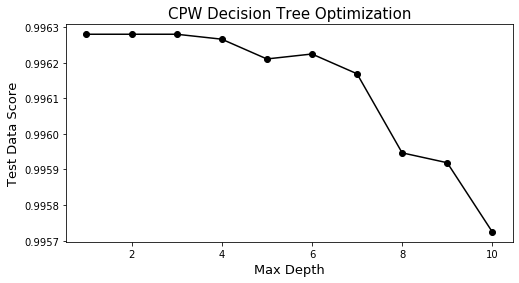

In [8]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), scores, marker='o', c='k')

plt.xlabel('Max Depth', fontsize=13)
plt.ylabel('Test Data Score', fontsize=13)
plt.title('CPW Decision Tree Optimization', fontsize=15)

In [9]:
max_score = np.max(scores)
max_depth = np.argmax(scores) + 1

print("The optimal test score is %0.3f, which derives from a max depth of %d." % (max_score, max_depth))

The optimal test score is 0.996, which derives from a max depth of 1.


## (7) Build your final model using the found _max_depth_ above

In [24]:
clf = DecisionTreeClassifier(max_depth=1, random_state=0)
clf.fit(X_train, y_train)

print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

0.9958726060420976
0.9962798445308162


## (8) Visualize decision tree process using tree.plot_tree

[Text(502.20000000000005, 407.70000000000005, 'X[5] <= 0.5\ngini = 0.008\nsamples = 216117\nvalue = [215225, 892]'),
 Text(251.10000000000002, 135.89999999999998, 'gini = 0.007\nsamples = 195695\nvalue = [195038, 657]'),
 Text(753.3000000000001, 135.89999999999998, 'gini = 0.023\nsamples = 20422\nvalue = [20187, 235]')]

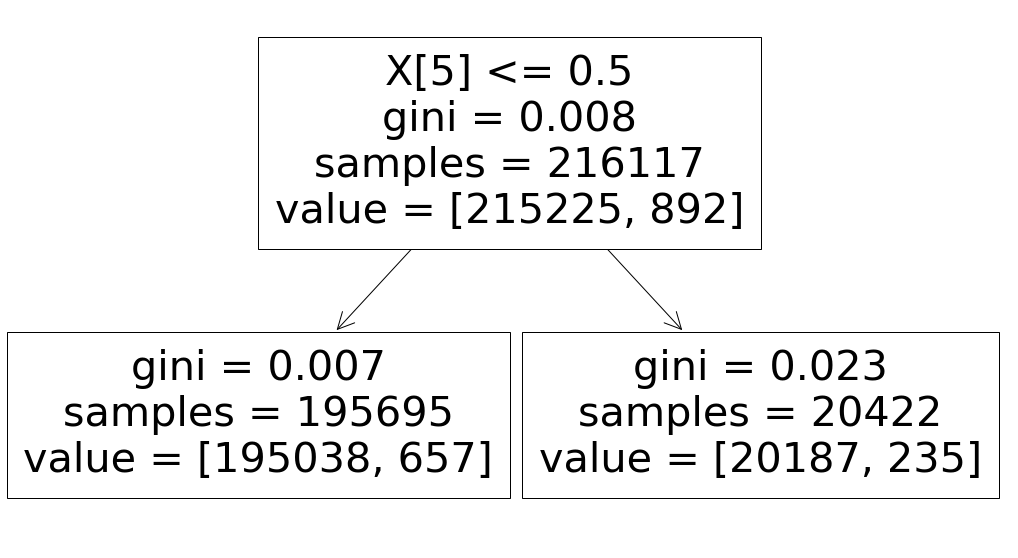

In [25]:
plt.figure(figsize=(18,10))
tree.plot_tree(clf.fit(X_train, y_train)) 

## (9) Create a feature importnaces plot

Text(0, 0.5, 'Feature')

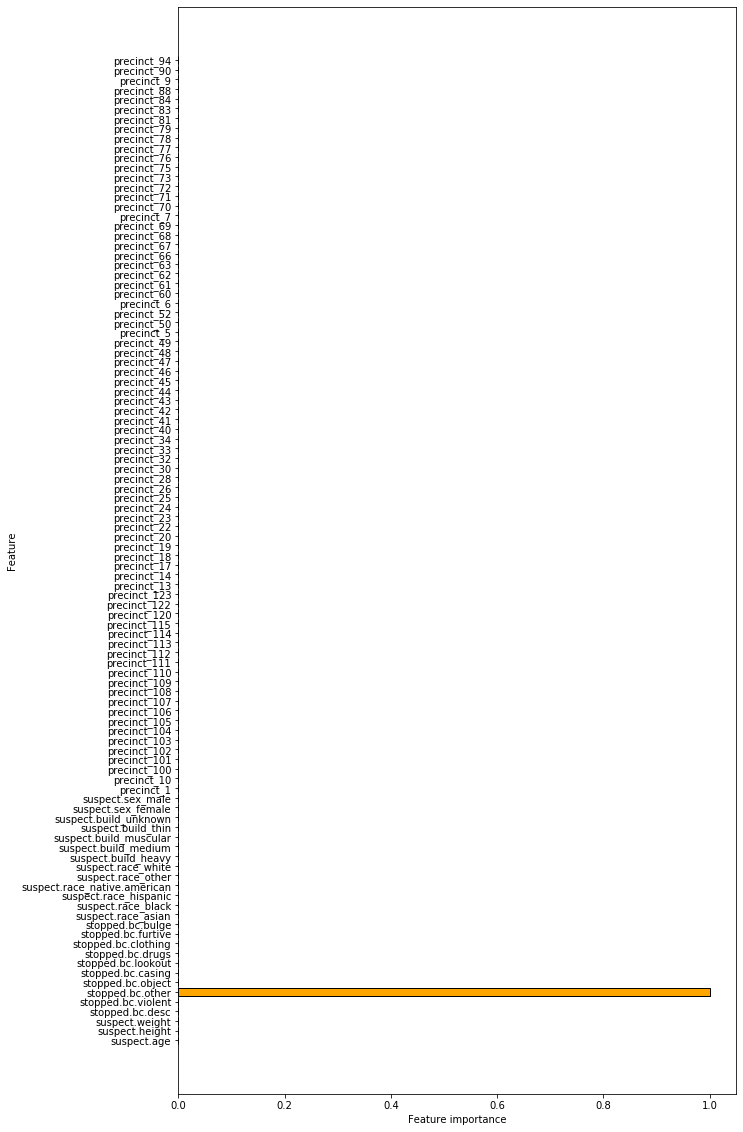

In [26]:
n_features = X.shape[1]
plt.figure(figsize=(10,20))
plt.barh(range(n_features), clf.feature_importances_, align='center', color='orange', edgecolor='k')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

## (10) Explain what you've found so far.

At a max depth of 1, the decision tree uses only one input variable to predict output: whether or not a suspect was stopped for a reason classified as 'other.' Given that only one input is used, it's quite remarkable that the model is able to produce an accuracy of greater than 99%. By this estimate, no characteristics of a suspect (age, build, race, gender, location, etc.) is the single best predictor of their likelihood of having a gun. Instead, whether or not there is a listed reason for their stop is overwhelmingly the best single-input predictor. 

# FOR EXTRA CREDITS:
## Try the same classification using random forests
* You can simply run a random forest classifier model and compare to the results from the decision tree models above.
* If possilbe, please try to tune parameters to find the best performed model
* I highly recommend using multicore (cpu) processing for better computing speed.

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

0.9997640167131693
0.9961271515824542


In [14]:
scores = []

for i in range(64, 129): 
    clf = RandomForestClassifier(n_estimators=i, random_state=0)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    
print(scores)

[0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961132704053304, 0.9961271515824542, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961271515824542, 0.9961132704053304, 0.9961271515824542, 0.9961132704053304, 0.996141032759578, 0.9961271515824542, 0.996141032759578, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961132704053304, 0.9961271515824542, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961132704053304, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0.9961271515824542, 0

In [21]:
scores_backup = scores

max_score = np.max(scores_backup)
max_depth = np.argmax(scores_backup) + 65

print("The optimal test score is %0.5f, which derives from a forest size of %d trees." % (max_score, max_depth))

The optimal test score is 0.99614, which derives from a forest size of 93 trees.


Text(0.5, 1.0, 'CPW Random Forest Optimization')

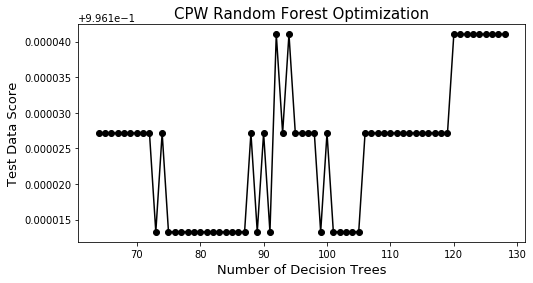

In [27]:
plt.figure(figsize=(8,4))
plt.plot(range(64, 129), scores_backup, marker='o', c='k')

plt.xlabel('Number of Decision Trees', fontsize=13)
plt.ylabel('Test Data Score', fontsize=13)
plt.title('CPW Random Forest Optimization', fontsize=15)

Text(0, 0.5, 'Feature')

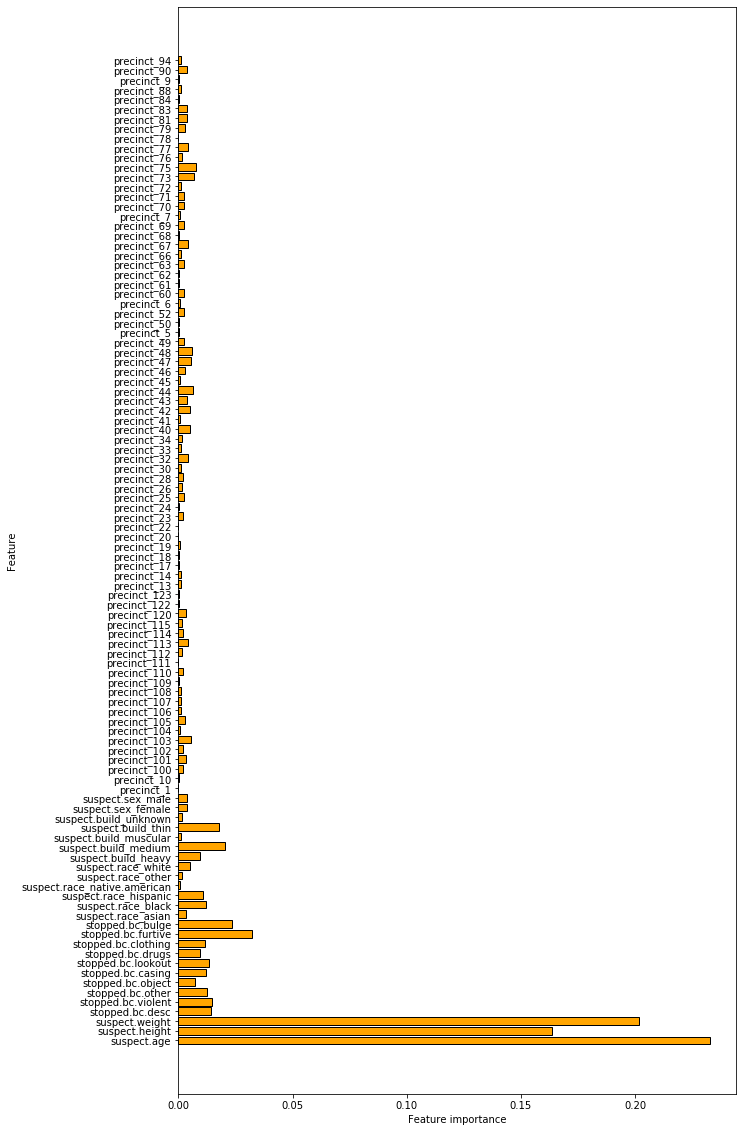

In [23]:
clf = RandomForestClassifier(n_estimators=93, random_state=0)
clf.fit(X_train, y_train)

n_features = X.shape[1]
plt.figure(figsize=(10,20))
plt.barh(range(n_features), clf.feature_importances_, align='center', color='orange', edgecolor='k')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

By contrast with the decision tree, every input variable now has some weight in the random forest's classification algorithm. Interestingly, suspects stopped for a reason listed as 'other', the only consideration made in a single-deep decision tree, is quite low-relevance in the random forest algorithm.

A suspects age, weight, and height are the greatest predicting factors of whether or not that suspect will be found with a gun. Other suspect descriptors have some impact on their likelihood of having a gun: particularly, a suspect who looks 'furtive' or has a bulge on their person have relatively high correlations with being found with a gun. Race has a quite low effect on this outcome, both within individual races and considering race overall. Gender is similarly insignificant as a predicting factor. Location (precinct) has a very low significance within any particular place (ie. no precinct/s has a massively difference amount of weapons found than any other), although the combined effect of place is moderate. In other words, there is some correlation between where a suspect is apprehended and their likelihood to have a gun, but this trend is not remarkably high in any specific precincts. 

Overall, the difference between the decision tree and random forest variable classifications tells us that a broad and nuanced analysis of suspect characteristics is likely needed to understand whether someone is likely to have a gun or not. 